<a href="https://colab.research.google.com/github/Githubprj1/Datascience_Project/blob/main/House_sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House sale prediction problem - Supervised Learning Problem

# Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

In [91]:
#for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [93]:
# to read the dataet
df = pd.read_csv('train-chennai-sale.csv')
pd.set_option('display.max_columns',None) #set_option changes the default number of rows or columns to change to specific order
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#COLUMNS

In [240]:
for i in df.columns:
    print(i)

area
int_sqft
n_bedroom
n_bathroom
n_room
park_facil
utility_avail
street
mzzone
sales_price
house_age
buildtype_Commercial
buildtype_House
buildtype_Others


#Data cleaning

In [95]:
# DATA CLEANING STARTS HERE ---> GO COLUMN BY COLUMN
def rename_cols(dataframe):
  cols=[var.lower() for var in dataframe.columns]
  dataframe.columns = cols
  return dataframe

In [96]:
df = rename_cols(df)

In [97]:
df.head(3)

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


In [98]:
df.shape  #row,colums

(7109, 22)

here,dataset rows = 7109 ; columns = 22

In [99]:
df.drop(columns = ['prt_id','reg_fee','commis'],inplace=True)

Through DATA reading manually we found
1.prt_id
2.reg_fee
3.commision
column are not needed becos prt_id is unique,reg_fee and commission occurs after sale so no use
Therefore we are dropping the columns


In [100]:
#df.shape[0]  # gives how many rows
#df.shape[1]  # gives how many columns
df.shape # gives rows and columns

(7109, 19)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           7109 non-null   object 
 1   int_sqft       7109 non-null   int64  
 2   date_sale      7109 non-null   object 
 3   dist_mainroad  7109 non-null   int64  
 4   n_bedroom      7108 non-null   float64
 5   n_bathroom     7104 non-null   float64
 6   n_room         7109 non-null   int64  
 7   sale_cond      7109 non-null   object 
 8   park_facil     7109 non-null   object 
 9   date_build     7109 non-null   object 
 10  buildtype      7109 non-null   object 
 11  utility_avail  7109 non-null   object 
 12  street         7109 non-null   object 
 13  mzzone         7109 non-null   object 
 14  qs_rooms       7109 non-null   float64
 15  qs_bathroom    7109 non-null   float64
 16  qs_bedroom     7109 non-null   float64
 17  qs_overall     7061 non-null   float64
 18  sales_pr

In [102]:
 # CHECKING NULL AND MISSING VALUES

 #checking null values
 df.isnull().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
sales_price       0
dtype: int64

Here, n_bedroom = 1, n_bathroom = 5 ,
qs_overall = 48 has null values

In [104]:
# need to impute or give value to null value place
df=df.fillna({'n_bedroom': st.mode(df['n_bedroom']),   #discrete data
              'n_bathroom': st.mode(df['n_bathroom']),
              'qs_overall': df['qs_overall'].mean()})  # st-statistics,we chose mean becos no outliers

here, the column n_bedroom  and n_bathroom is discrete, therefore the central measure MODE(frequently occuring) is correct to replace the null value
here, the column qs_overall is continous , therefore the central measure MEAN or MEDIAN is correct to replace the null value

In [105]:
df.isnull().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
dtype: int64

In [106]:
# DATATYPE CORRECTION IF NEEDED
df.dtypes

area              object
int_sqft           int64
date_sale         object
dist_mainroad      int64
n_bedroom        float64
n_bathroom       float64
n_room             int64
sale_cond         object
park_facil        object
date_build        object
buildtype         object
utility_avail     object
street            object
mzzone            object
qs_rooms         float64
qs_bathroom      float64
qs_bedroom       float64
qs_overall       float64
sales_price        int64
dtype: object

Here,data_sale(obj) need to be --> date-time
n_bedroom(float64)  ---> int      
n_bathroom(float64) ---> int
date_build(object)  ---> date-time  

In [107]:
# correcting to correct datatype
df['n_bedroom'] = df['n_bedroom'].astype(int)
df['n_bathroom'] = df['n_bathroom'].astype(int)
df['date_build'] = pd.to_datetime(df['date_build'])
df['date_sale'] = pd.to_datetime(df['date_sale'])

<ipython-input-107-05d435c904f7>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_build'] = pd.to_datetime(df['date_build'])
<ipython-input-107-05d435c904f7>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_sale'] = pd.to_datetime(df['date_sale'])


In [108]:
df.dtypes

area                     object
int_sqft                  int64
date_sale        datetime64[ns]
dist_mainroad             int64
n_bedroom                 int64
n_bathroom                int64
n_room                    int64
sale_cond                object
park_facil               object
date_build       datetime64[ns]
buildtype                object
utility_avail            object
street                   object
mzzone                   object
qs_rooms                float64
qs_bathroom             float64
qs_bedroom              float64
qs_overall              float64
sales_price               int64
dtype: object

In [109]:
# now to check whether we can create any new column for insights further
df['house_age'] = df['date_sale'].dt.year - df['date_build'].dt.year

Here, with the column date_sale, date_build we can predict house age(how many years the building is old)

In [110]:
df.head(1)

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,7600000,44


In [111]:
df.house_age

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: house_age, Length: 7109, dtype: int64

In [112]:
df.shape

(7109, 20)

In [113]:
# checking the datatypes as whole categorical and Numerical
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64,datetime64[ns]
0,7,7,4,2


here, we have 7-categorical,7-discrete,4-continuous,2-date-time

In [114]:
# seperating categorical and integer value
integer_data_cols = [var for var in df.columns if df[var].dtypes == 'int64']
integer_data_cols

['int_sqft',
 'dist_mainroad',
 'n_bedroom',
 'n_bathroom',
 'n_room',
 'sales_price',
 'house_age']

In [115]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall']

In [117]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['area',
 'sale_cond',
 'park_facil',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone']

In [119]:
 # column by column analysis
df['area'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

In [120]:
# spelling mistakes in column
df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})

In [121]:
df['area'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

In [122]:
df['sale_cond'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

In [123]:
df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})

In [124]:
df['sale_cond'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [125]:
df['park_facil'].value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

In [126]:
df['park_facil']=df['park_facil'].replace({'Noo':'No'})

In [127]:
df['park_facil'].value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

In [129]:
df['buildtype'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

In [130]:
#df['buildtype'] = df['buildtype'].replace({'others':'other','commercial':'comercial'}) #here i made a mistake of giveing it in different column order,1st should be comme,then others
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})

In [131]:
df['buildtype'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [132]:
df['utility_avail'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

In [133]:
#df['utility_avail'] = df['utility_avail'].replace({'All Pub':'AllPub','NoSeWa':'No Sewer','NoSewr':'No Sewer'})
df['utility_avail'] = df['utility_avail'].replace(['All Pub','NoSewr ','NoSeWa'],['AllPub','No Sewer','No Sewer'])

In [134]:
df['utility_avail'].value_counts()

No Sewer    3700
AllPub      1887
ELO         1522
Name: utility_avail, dtype: int64

In [135]:
df['street'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [136]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [137]:
df['street'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [138]:
df['mzzone'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

In [139]:
df=df.drop_duplicates() # drops the repeated row if any

In [140]:
df

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,No Sewer,No Access,RH,3.6,4.5,3.3,3.920,10818480,9
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,No Sewer,Gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32


In [141]:
df.shape

(7109, 20)

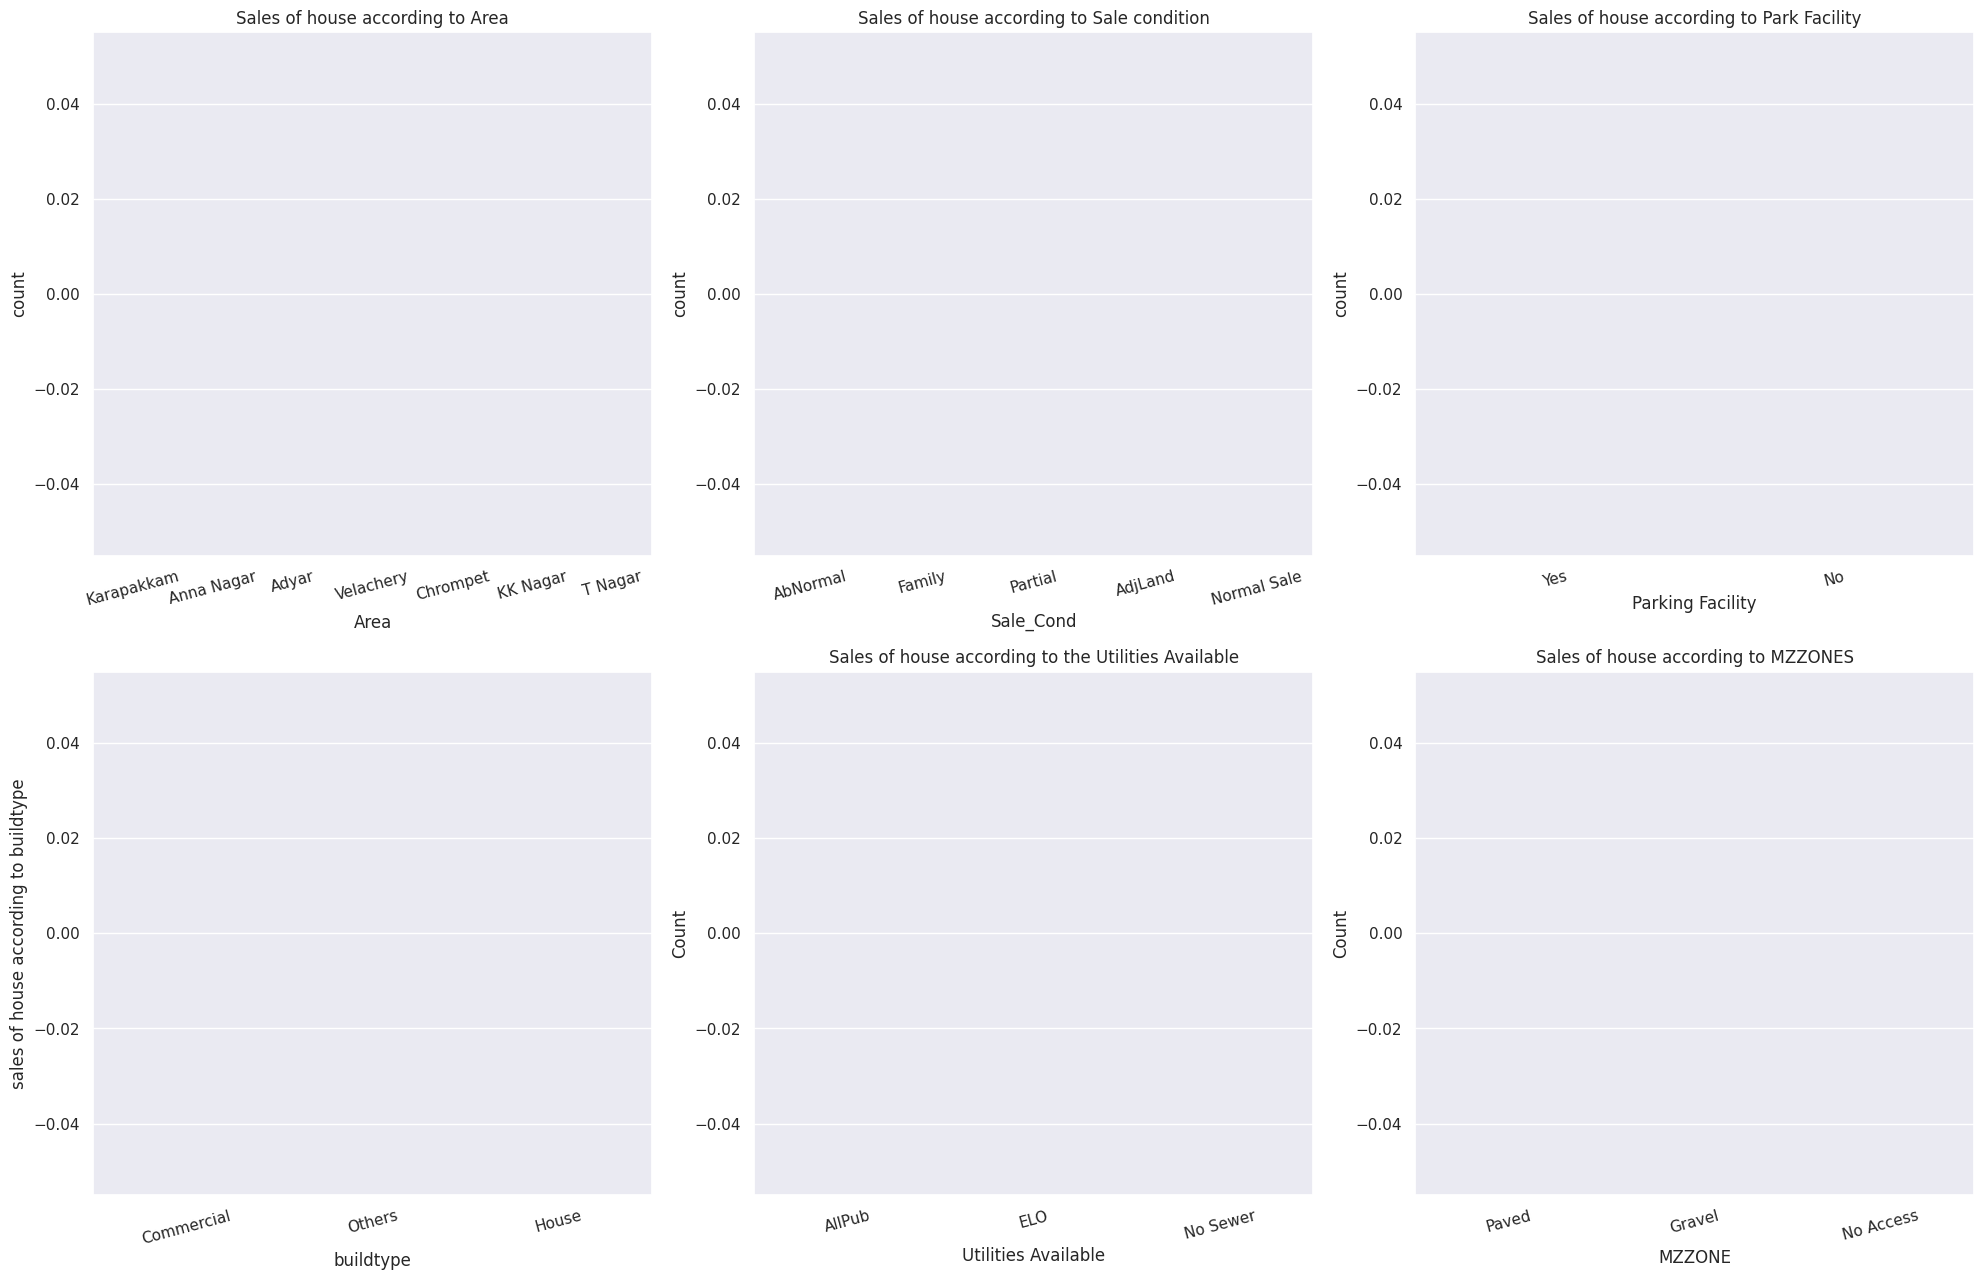

In [170]:
# DATA VISULIZATION STARTS         -- EXPLORATORY DATA ANALYSIS
# WHY PLOT -- BECAUSE WE ARE GOOD AT ABSORBING PLOT FASTER THAN NUMBER ANALYSIS
# DISTRIBUTION OF CATEGORICAL FEATURE

sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
#sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
sns.barplot(x=df['area'],y=df['area'].value_counts())
plt.xticks(rotation=15)
plt.xlabel('Area') # categorical column
plt.ylabel('count')
plt.title('Sales of house according to Area')

plt.subplot(432)
#sns.countplot(df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
sns.barplot(x=df['sale_cond'],y=df['sale_cond'].value_counts())
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond') # categorical column
plt.ylabel('count')
plt.title('Sales of house according to Sale condition')

plt.subplot(433)
#sns.countplot(df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
sns.barplot(x=df['park_facil'],y=df['park_facil'].value_counts())
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('count')
plt.title('Sales of house according to Park Facility')

plt.subplot(434)
#sns.countplot(df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
sns.barplot(x=df['buildtype'],y=df['buildtype'].value_counts())
plt.xticks(rotation=15)
plt.xlabel('buildtype')
plt.ylabel('sales of house according to buildtype')

plt.subplot(435)
df['utility_avail'].value_counts()
#sns.countplot(df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
sns.barplot(x=df['utility_avail'],y=df['utility_avail'].value_counts())
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of house according to the Utilities Available')

plt.subplot(436)
#sns.barplotplot(df['street'],order=df['street'].value_counts().index[::-1])
sns.barplot(x=df['street'],y=df['street'].value_counts())
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of house according to MZZONES')
#plt.show()

plt.tight_layout()

Interpretations from the distribution plot above:
1. Area does not follow a uniform distribution - number of houses in chrompet are way higher than that in T-nagar
2.Sales cond,park facility,build type fllow a uniform distribution
3.No of houses in non-residential area is way lower than the no of houses in residential areas. Among the residential zone,RM,RL,RH uniform distributed.(MMZONE)
4.No of houses with No Access is lower compared to paved and gravel category
5.Utilities plot - no of houses with no sewage is higher than elo,with sewage

In [147]:
# sort or do Ascending order to the feature and target variable with average value(mean) before plotting
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

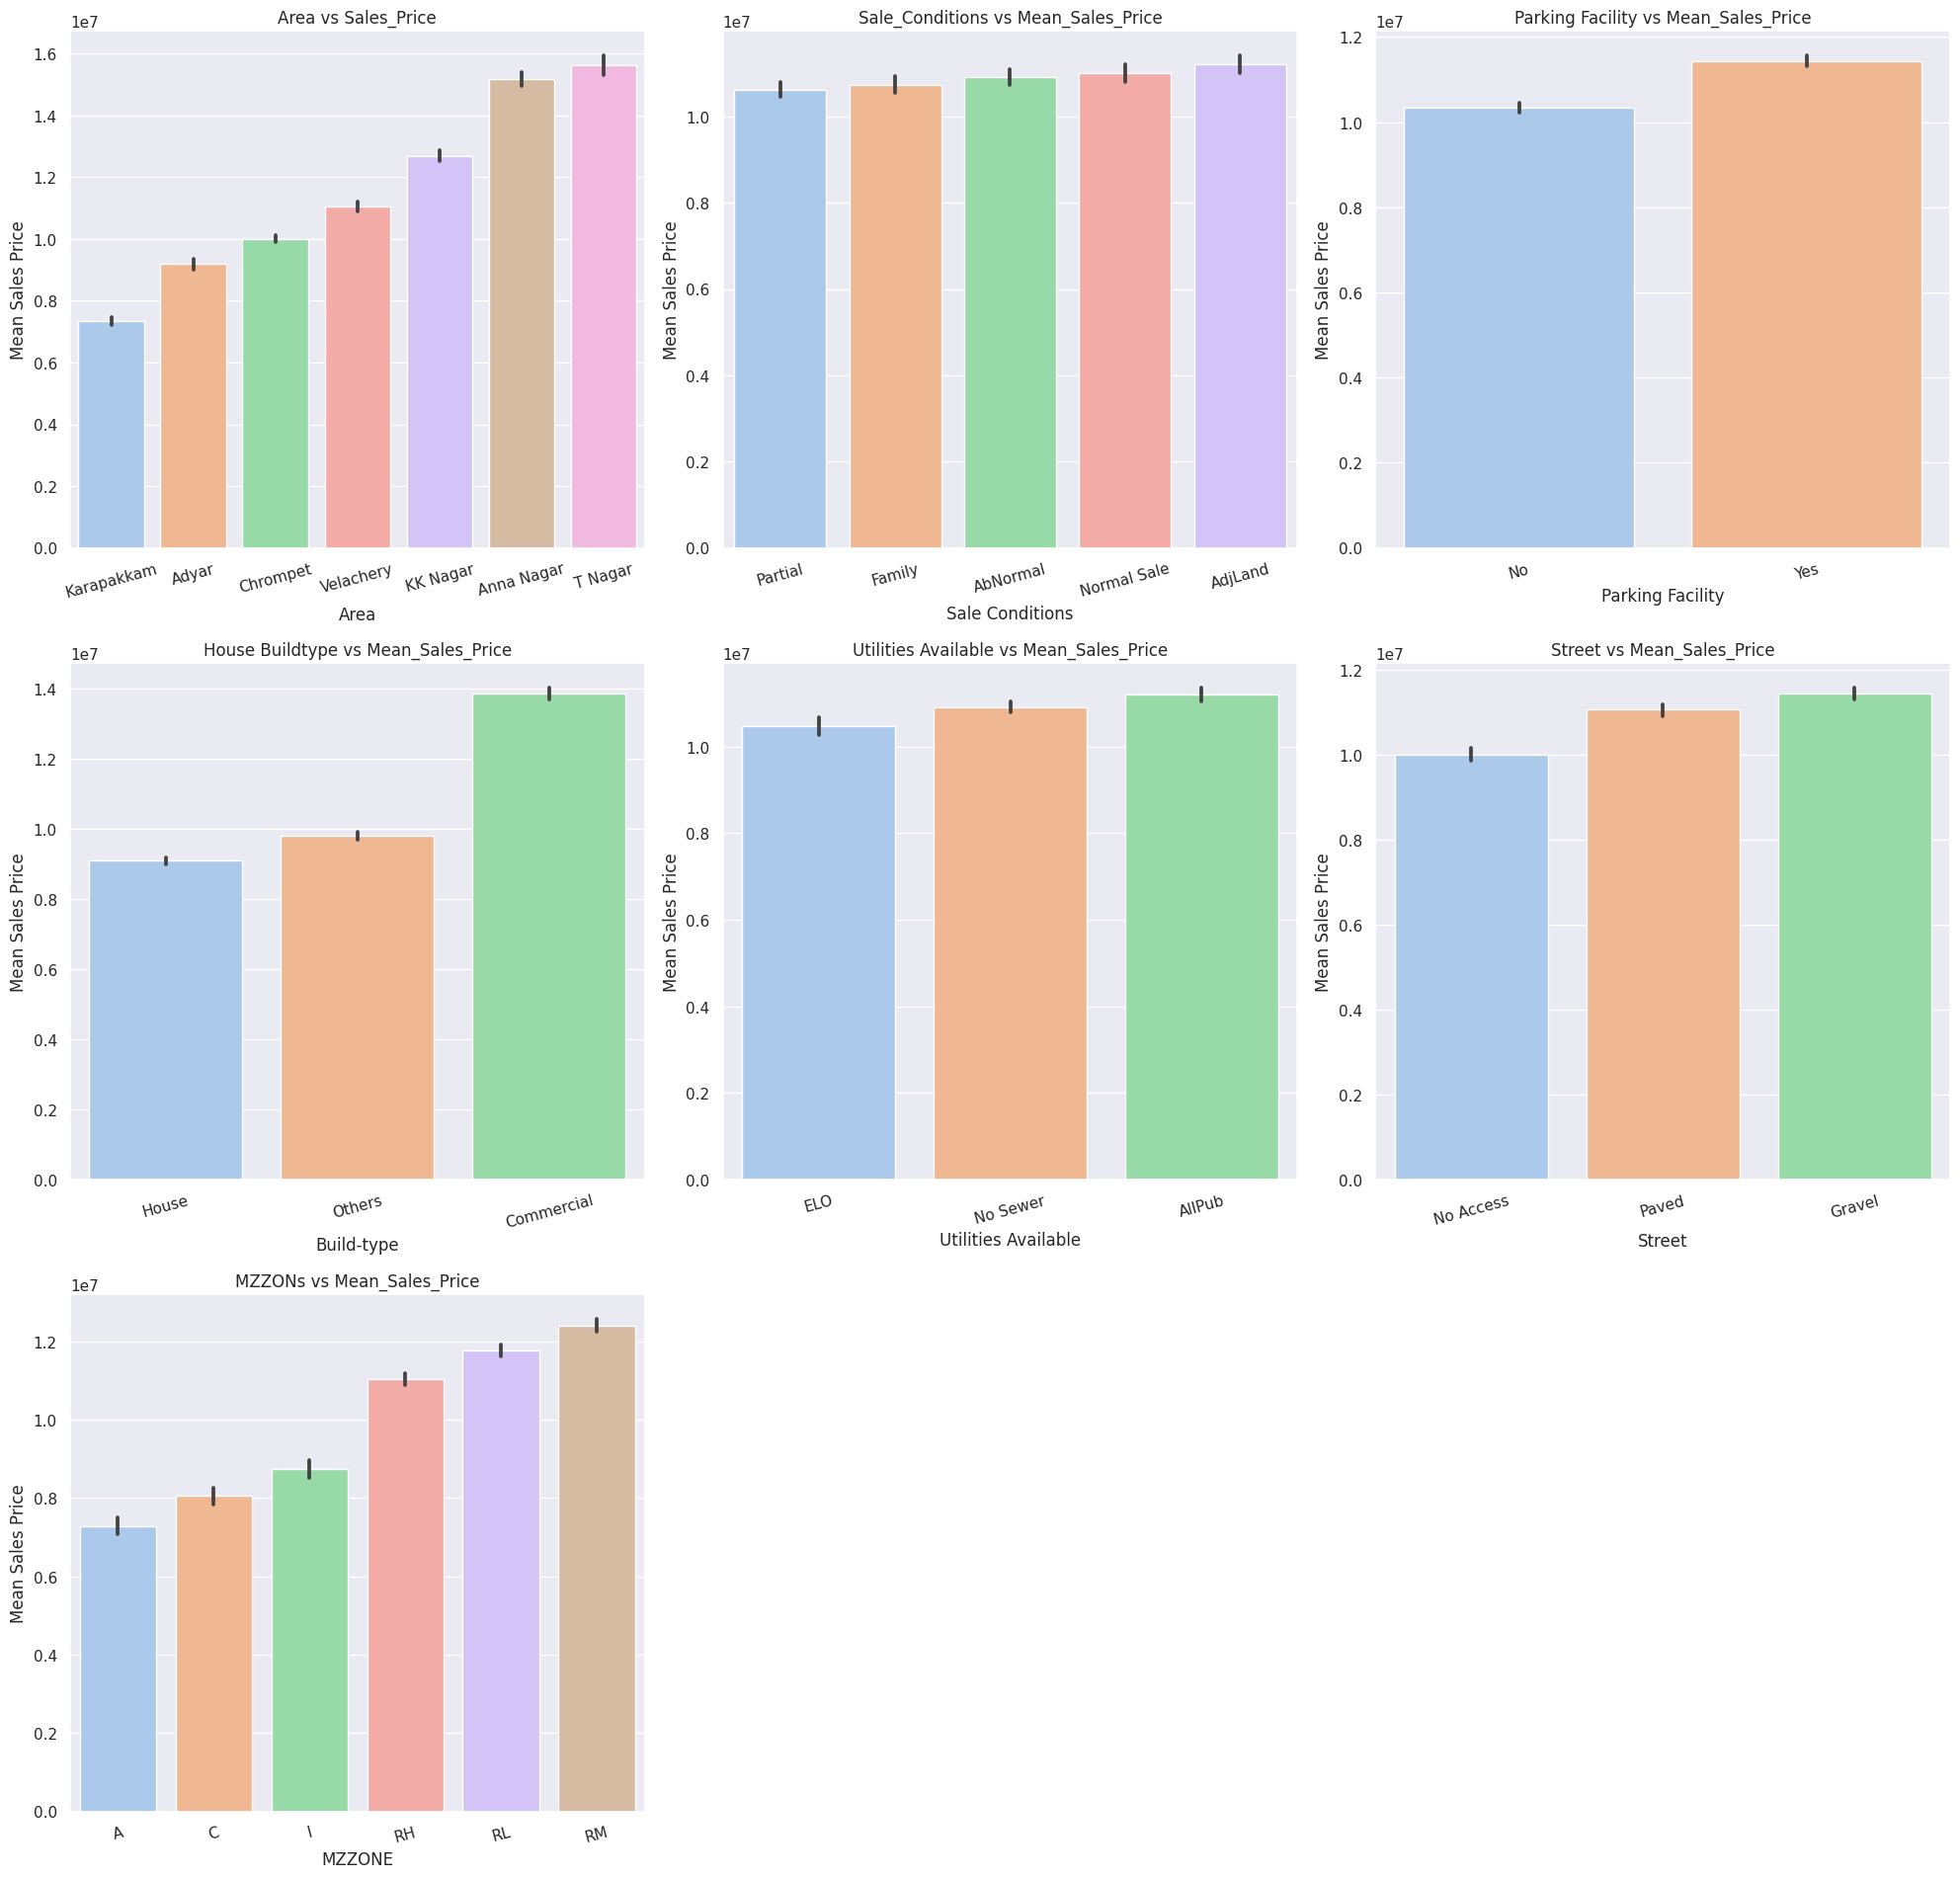

In [164]:
# FEATURE VS TARGET ---> IMPORTANT IN EDA -- HERE Target variable is Sales Price
# Here feature is categorical and target is continous -- doing bar plot

plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(x=df['area'],y=df['sales_price'],order=area_order)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Sales_Price')
#plt.show()

plt.subplot(432)
sns.barplot(x=df['sale_cond'],y=df['sales_price'],order=sale_cond_order)
plt.xticks(rotation=15)
plt.xlabel('Sale Conditions')
plt.ylabel('Mean Sales Price')
plt.title('Sale_Conditions vs Mean_Sales_Price')

plt.subplot(433)
sns.barplot(x=df['park_facil'],y=df['sales_price'],order=park_facil_order)
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Mean Sales Price')
plt.title('Parking Facility vs Mean_Sales_Price')

plt.subplot(434)
sns.barplot(x=df['buildtype'],y=df['sales_price'],order=buildtype_order)
plt.xticks(rotation=15)
plt.xlabel('Build-type')
plt.ylabel('Mean Sales Price')
plt.title('House Buildtype vs Mean_Sales_Price')

plt.subplot(435)
sns.barplot(x=df['utility_avail'],y=df['sales_price'],order=utility_avail_order)
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Mean Sales Price')
plt.title('Utilities Available vs Mean_Sales_Price')

plt.subplot(436)
sns.barplot(x=df['street'],y=df['sales_price'],order=street_order)
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Mean Sales Price')
plt.title('Street vs Mean_Sales_Price')

plt.subplot(437)
sns.barplot(x=df['mzzone'],y=df['sales_price'],order=mzzone_order)
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Mean Sales Price')
plt.title('MZZONs vs Mean_Sales_Price')

plt.tight_layout()

By following below steps we need to confirm the importance.
when we plot feature vs target plot should always satisfy below steps,
1)Is the feature and target(area vs sales price) is having relationship? YES,we have relationship between area and sales(i.e: t-nagar area is high with sales,anna nagar is quite less in sales than t-nagar,...)
2)Is there a Linear reationship(straight line or not) in feature vs target? YES
3) Encoding - Here there is Linear Order so we do Label Encoding

Buildtype:
1) having relationship : YES
2) Linear Relationship : NO
3) Encoding: one hot because no linear order Commerical is more higher than others,house(there no unit raise in the graph so no linear)


Text(0.5, 1.0, 'House Age vs Sales_Price')

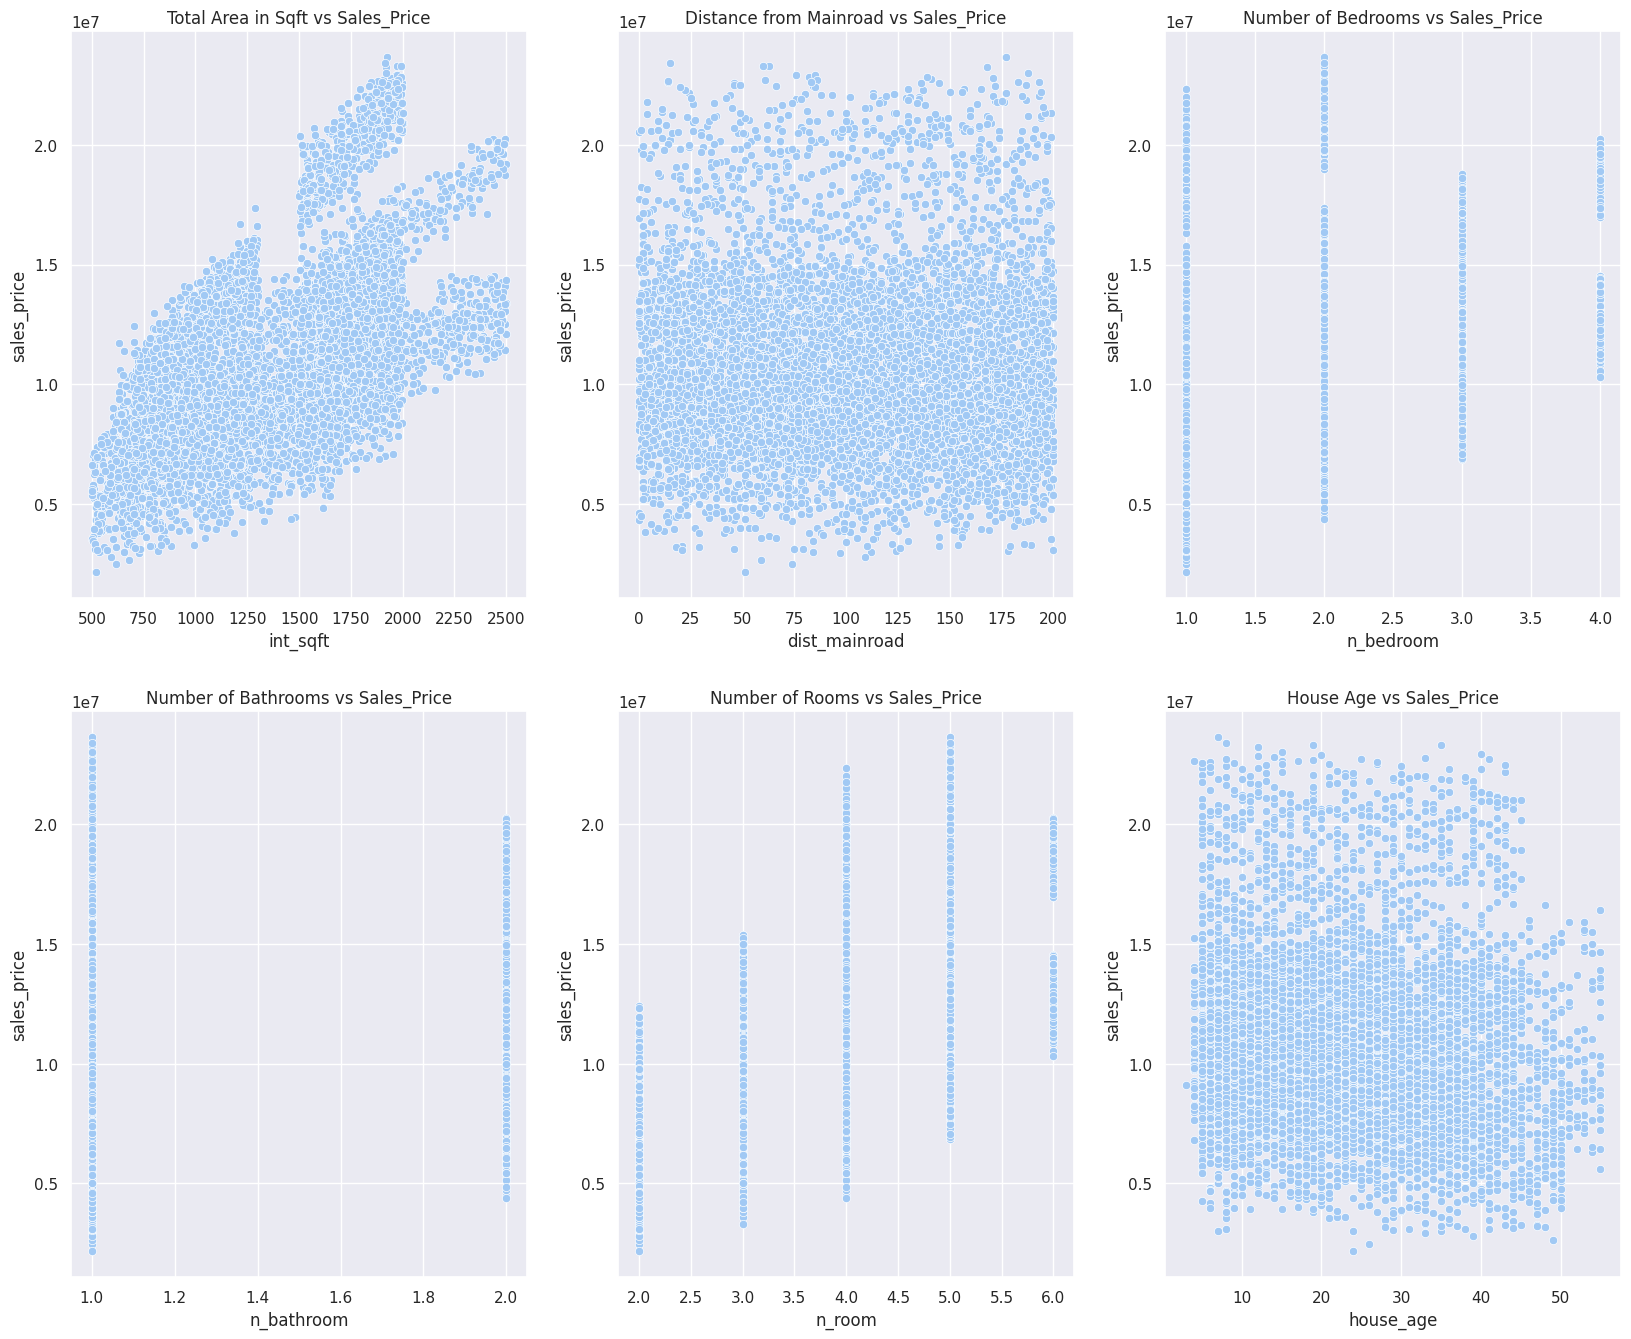

In [175]:
## FEATURE VS TARGET ---> IMPORTANT IN EDA -- HERE Target variable is Sales Price
# Here feature is Numerical and target is continous -- doing line plot
plt.figure(figsize=(20,25))
plt.subplot(331)
#sns.lineplot(df['int_sqft'],df['sales_price'])
sns.scatterplot(x=df['int_sqft'],y=df['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')
plt.subplot(332)
#sns.lineplot(df['dist_mainroad'],df['sales_price'])
sns.scatterplot(x=df['dist_mainroad'],y=df['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')
plt.subplot(333)
#sns.lineplot(df['n_bedroom'],df['sales_price'])
sns.scatterplot(x=df['n_bedroom'],y=df['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')
plt.subplot(334)
#sns.lineplot(df['n_bathroom'],df['sales_price'])
sns.scatterplot(x=df['n_bathroom'],y=df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')
plt.subplot(335)
#sns.lineplot(df['n_room'],df['sales_price'])
sns.scatterplot(x=df['n_room'],y=df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')
plt.subplot(336)
#sns.lineplot(df['house_age'],df['sales_price'])
sns.scatterplot(x=df['house_age'],y=df['sales_price'])
plt.title('House Age vs Sales_Price')

below need to be checked:
1)There is relationship bet, feature and target
2)There is linear relationship between the feature and target
3)If there is no linear relationship, we need to tranformation (where x will be x^2,x^3,sq.root(x),log x,e^x)

Here, in 1st plot int_sqft vs sales_price,
1)There is relationship bet, feature and target? YES
2)There is linear relationship between the feature and target?yes
3) No transformation is required becouse we have linear relationship between feature and target.

In 2nd plot Dist_mainroad vs Salesprice,
1)There is relationship bet, feature and target? NO
SO, WE CAN DROP THE DIST_ROAD COLUMN

Likewise we need to check each column....


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'House Age vs Sales_Price')

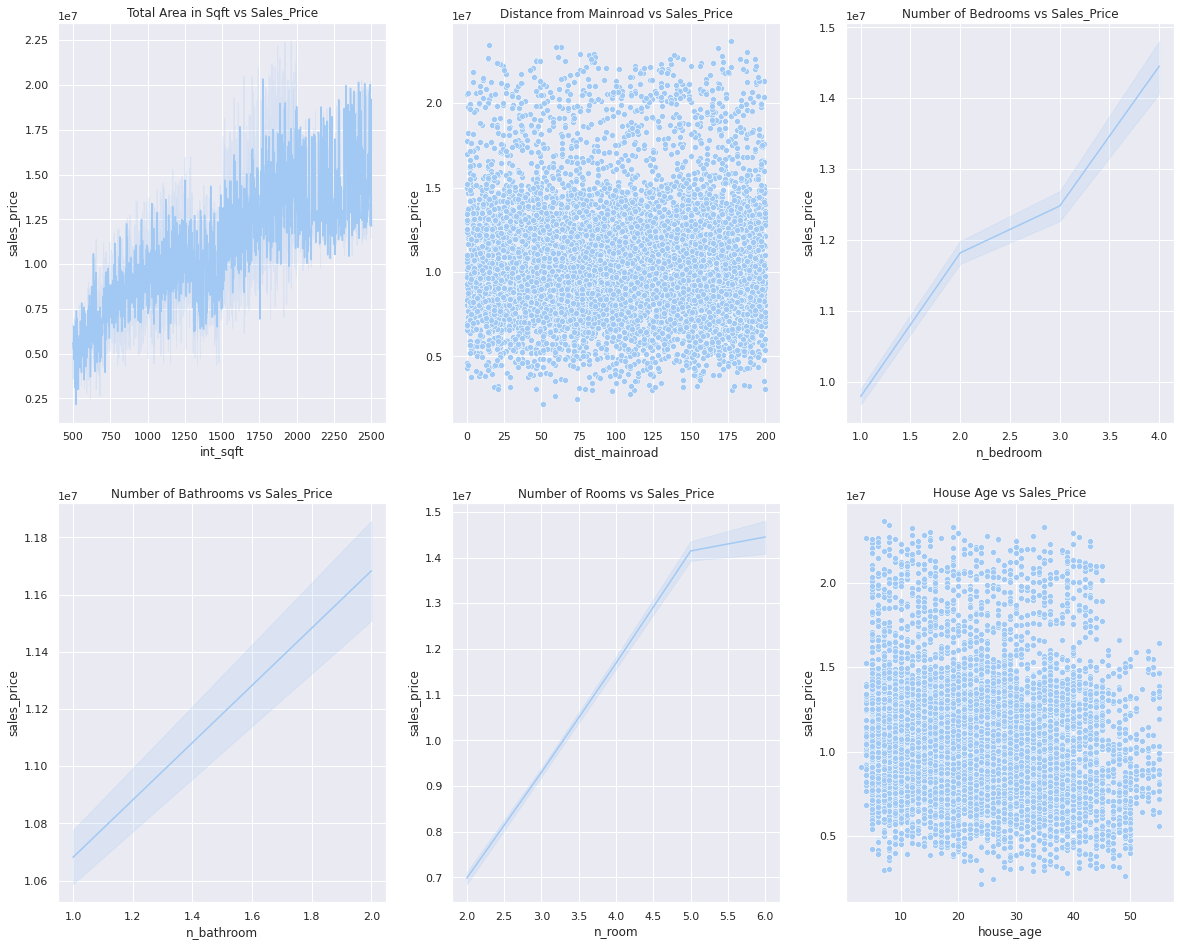

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.lineplot(df['int_sqft'],df['sales_price'])
#sns.scatterplot(df['int_sqft'],df['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')
plt.subplot(332)
#sns.lineplot(df['dist_mainroad'],df['sales_price'])
sns.scatterplot(df['dist_mainroad'],df['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')
plt.subplot(333)
sns.lineplot(df['n_bedroom'],df['sales_price'])
#sns.scatterplot(df['n_bedroom'],df['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')
plt.subplot(334)
sns.lineplot(df['n_bathroom'],df['sales_price'])
#sns.scatterplot(df['n_bathroom'],df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')
plt.subplot(335)
sns.lineplot(df['n_room'],df['sales_price'])
#sns.scatterplot(df['n_room'],df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')
plt.subplot(336)
#sns.lineplot(df['house_age'],df['sales_price'])
sns.scatterplot(df['house_age'],df['sales_price'])
plt.title('House Age vs Sales_Price')

In [176]:
df[['dist_mainroad','sales_price']].corr()

,dist_mainroad,sales_price
dist_mainroad,1.000000,0.018783
sales_price,0.018783,1.000000


In [177]:
df[['house_age','sales_price']].corr() #house age is having relationship with target BUT NOT LINEAR REALTIONSHIP SO NEED TO DO TRANSFORM

,house_age,sales_price
house_age,1.000000,-0.118842
sales_price,-0.118842,1.000000


In [178]:
#Note: other way to find linear relationship between numerical vs numerical is CORRELATION
# when value is greater than 0.2 and less than -0.2 THERE IS STRONG LINEAR RELATIONSHIP
#df[['int_sqft','sales_price']].corr
#Here it is 0.61 so there is good linear relationship , it is greater than 0.2

,tmp,sales_price
tmp,1.000000,-0.124443
sales_price,-0.124443,1.000000


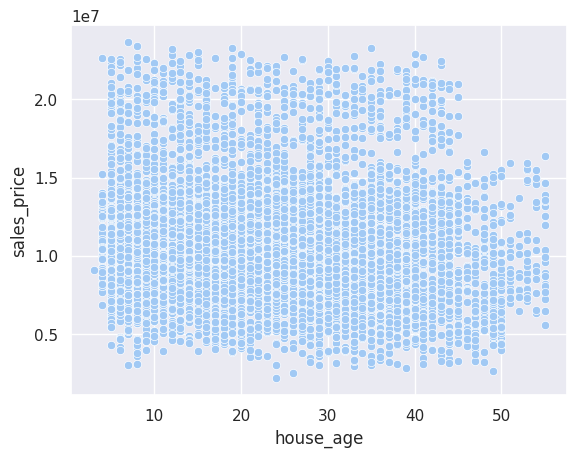

In [180]:
# TRANSFORM FOR HOUSE AGE
df['tmp'] = np.square(df['house_age'])  # here x-axis is house age , squaring x values and trying to find linaer relationship
sns.scatterplot(x=df['house_age'],y=df['sales_price'])
df[['tmp','sales_price']].corr()

no linear relationship with x as x square values

,tmp,sales_price
tmp,1.000000,-0.124077
sales_price,-0.124077,1.000000


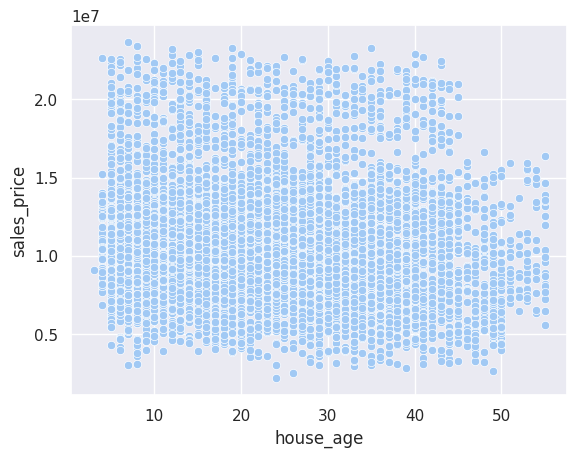

In [181]:
df['tmp'] = np.power(df['house_age'],3)  # here x-axis is house age , cube x values and trying to find linaer relationship
sns.scatterplot(x=df['house_age'],y=df['sales_price'])
df[['tmp','sales_price']].corr()

no linear relationship with x as x ccube values

,tmp,sales_price
tmp,1.000000,-0.103007
sales_price,-0.103007,1.000000


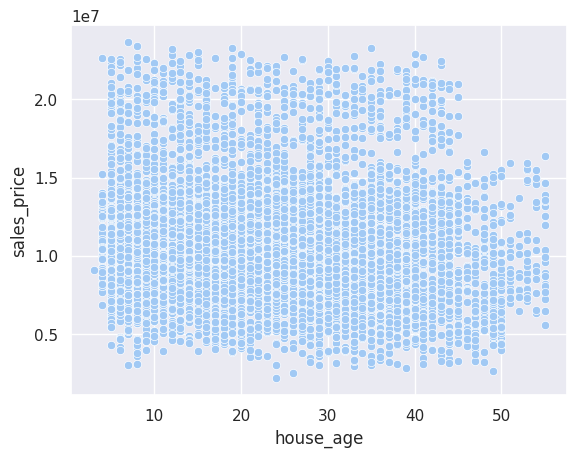

In [183]:
df['tmp'] = np.log(df['house_age'])  # here x-axis is house age , log x values and trying to find linaer relationship
sns.scatterplot(x=df['house_age'],y=df['sales_price'])
df[['tmp','sales_price']].corr()

no linear relationship with x as log values

,tmp,sales_price
tmp,1.000000,-0.112391
sales_price,-0.112391,1.000000


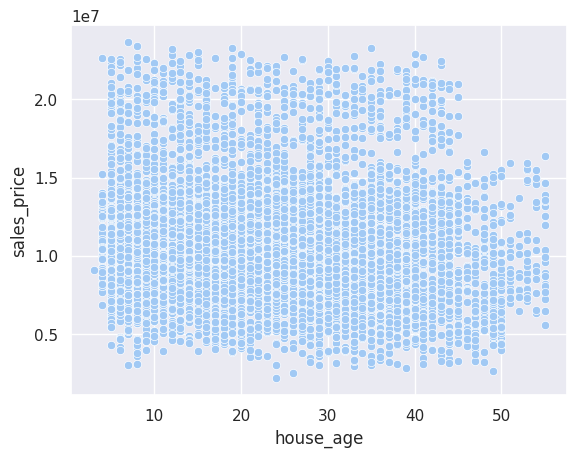

In [184]:
df['tmp'] = np.power(df['house_age'],0.5)  # here x-axis is house age , square root x values and trying to find linaer relationship
sns.scatterplot(x=df['house_age'],y=df['sales_price'])
df[['tmp','sales_price']].corr()

no linear relationship with x as square root values

from the above transformation the house age is not having linear relationship, we should do other model because it has relationship with target

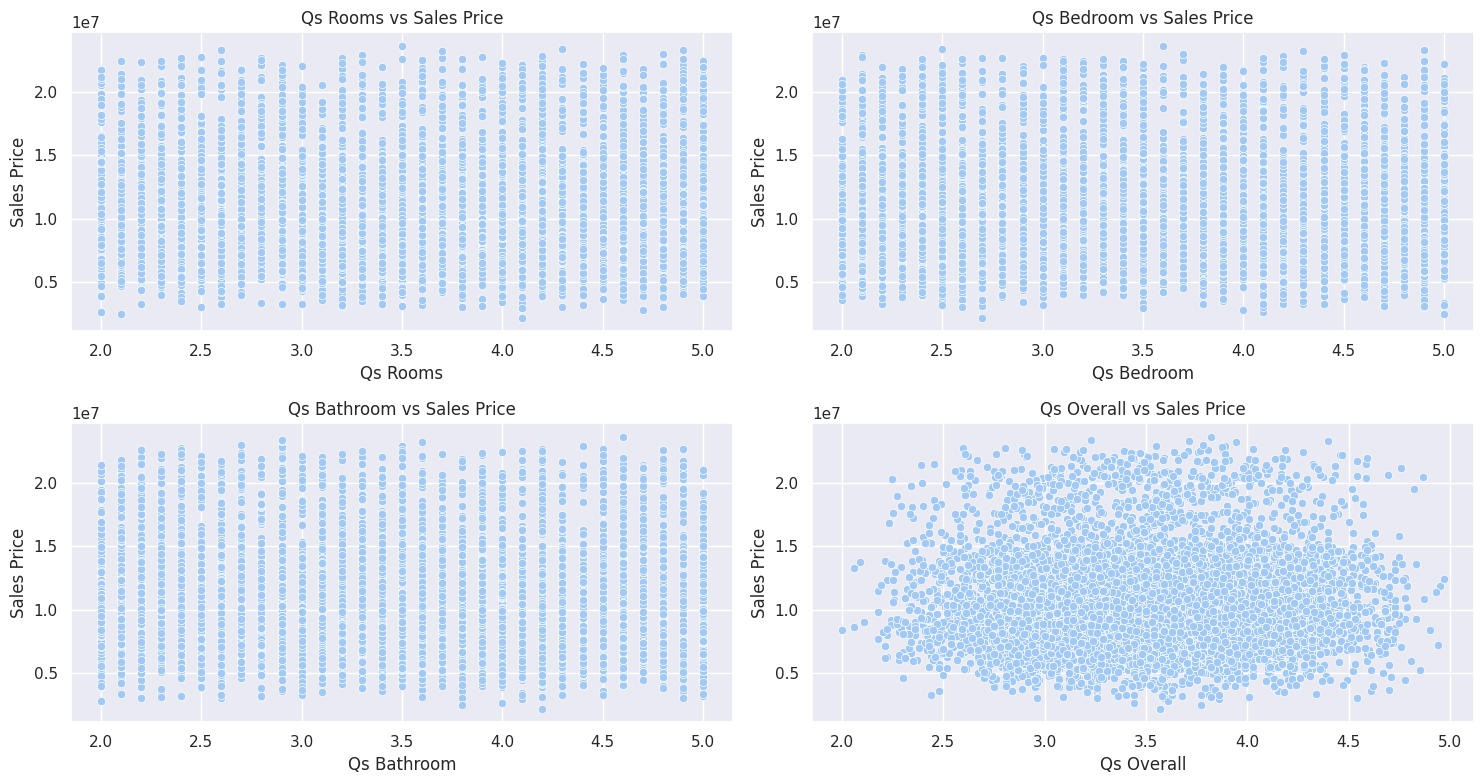

In [185]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.scatterplot(x=df['qs_rooms'],y=df['sales_price'])
plt.xlabel('Qs Rooms')
plt.ylabel('Sales Price')
plt.title('Qs Rooms vs Sales Price')

plt.subplot(222)
sns.scatterplot(x=df['qs_bedroom'],y=df['sales_price'])
plt.xlabel('Qs Bedroom')
plt.ylabel('Sales Price')
plt.title('Qs Bedroom vs Sales Price')

plt.subplot(223)
sns.scatterplot(x=df['qs_bathroom'],y=df['sales_price'])
plt.xlabel('Qs Bathroom')
plt.ylabel('Sales Price')
plt.title('Qs Bathroom vs Sales Price')

plt.subplot(224)
sns.scatterplot(x=df['qs_overall'],y=df['sales_price'])
plt.xlabel('Qs Overall')
plt.ylabel('Sales Price')
plt.title('Qs Overall vs Sales Price')

plt.tight_layout()

In [186]:
df[['qs_rooms','sales_price']].corr()

,qs_rooms,sales_price
qs_rooms,1.000000,0.021967
sales_price,0.021967,1.000000


In [187]:
df[['qs_bedroom','sales_price']].corr()

,qs_bedroom,sales_price
qs_bedroom,1.000000,0.018804
sales_price,0.018804,1.000000


In [188]:
df[['qs_bathroom','sales_price']].corr()

,qs_bathroom,sales_price
qs_bathroom,1.000000,-0.011377
sales_price,-0.011377,1.000000


In [189]:
df[['qs_overall','sales_price']].corr()

,qs_overall,sales_price
qs_overall,1.000000,0.020485
sales_price,0.020485,1.000000


Here QS ROOM,BEDROOM,BATHROOm,OVERALL has NO RELATIONSHIP with target(sales price)
So we can DROP THIS COLUMNS

#ENCODING

In [190]:
#ENCODING CATEGORICAL DATA as PER EDA
# HERE THE LABEL ENCODING IS CHOOSEN BECAUSE IT HAS LINEAR RELATIONSHIP
df['area'] = df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['street'] = df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})
df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
df['sale_cond'] = df['sale_cond'].map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
df['utility_avail'] = df['utility_avail'].map({'ELO':0,'No Sewer':1,'AllPub':2})

In [191]:
# ONE HOT ENCODING FOR BUILD TYPE BECOS NO LINEAR REALTIONSHIP BUT HAS RELATIONSHIP
df = pd.get_dummies(df,columns = ['buildtype'])   # for one hot - pd.get_dummies will do

In [192]:
df.head()

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age,tmp,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,2,1,0,4.0,3.9,4.9,4.330,7600000,44,6.633250,1,0,0
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,2,2,3,4.9,4.2,2.5,3.765,21717770,11,3.316625,1,0,0
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,0,2,4,4.1,3.8,2.2,3.090,13159200,20,4.472136,1,0,0
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,1,1,2,4.7,3.9,3.6,4.010,9630290,22,4.690416,0,0,1
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,2,2,1,3.0,2.5,4.1,3.290,7406250,30,5.477226,0,0,1


In [193]:
del df['date_build']  # this doesn't needed because we have house age from this insight
del df['tmp']
del df['date_sale']
del df['qs_rooms']
del df['dist_mainroad']
del df['qs_bedroom']
del df['qs_overall']
del df['sale_cond']  # there is no more difference between the values so deleting

In [194]:
del df['qs_bathroom']

In [195]:
df

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,sales_price,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,3,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,4,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,0,5,5353000,49,0,0,1
7105,3,1897,3,2,5,1,1,0,3,10818480,9,0,0,1
7106,3,1614,2,1,4,0,1,2,2,8351410,28,0,1,0
7107,0,787,1,1,2,1,0,1,4,8507000,32,1,0,0


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   area                  7109 non-null   int64
 1   int_sqft              7109 non-null   int64
 2   n_bedroom             7109 non-null   int64
 3   n_bathroom            7109 non-null   int64
 4   n_room                7109 non-null   int64
 5   park_facil            7109 non-null   int64
 6   utility_avail         7109 non-null   int64
 7   street                7109 non-null   int64
 8   mzzone                7109 non-null   int64
 9   sales_price           7109 non-null   int64
 10  house_age             7109 non-null   int64
 11  buildtype_Commercial  7109 non-null   uint8
 12  buildtype_House       7109 non-null   uint8
 13  buildtype_Others      7109 non-null   uint8
dtypes: int64(11), uint8(3)
memory usage: 945.3 KB


In [197]:
df.shape

(7109, 14)

In [198]:
#    splitting the data into input and output data
#   it is best practice to keep X(Features), y(target value)
X = df.drop('sales_price',axis=1)
y = df['sales_price']



In [199]:
X

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,2,1,0,44,1,0,0
1,5,1986,2,1,5,0,2,2,3,11,1,0,0
2,1,909,1,1,3,1,0,2,4,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,0,5,49,0,0,1
7105,3,1897,3,2,5,1,1,0,3,9,0,0,1
7106,3,1614,2,1,4,0,1,2,2,28,0,1,0
7107,0,787,1,1,2,1,0,1,4,32,1,0,0


In [200]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: sales_price, Length: 7109, dtype: int64

#Train , Test split

In [201]:
# splitting the data into training and testing the sets with ratio 8:2
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 500) #80% train , 20% test datas
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,) #80% train , 20% test datas
# RANDOM_STATE IS USED BECOS IT TAKES RANDOM VALUES FROM DATA , we can use this when we give this to other colleagues to follow the same randomness

#X_train ----> features of training dataset
#X_test  ----> features of test dataset
#y_train  ---> target varible of training dataset
#y_test   ----> target variable of test dataset


In [202]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5687, 13) (1422, 13) (5687,) (1422,)


<Axes: >

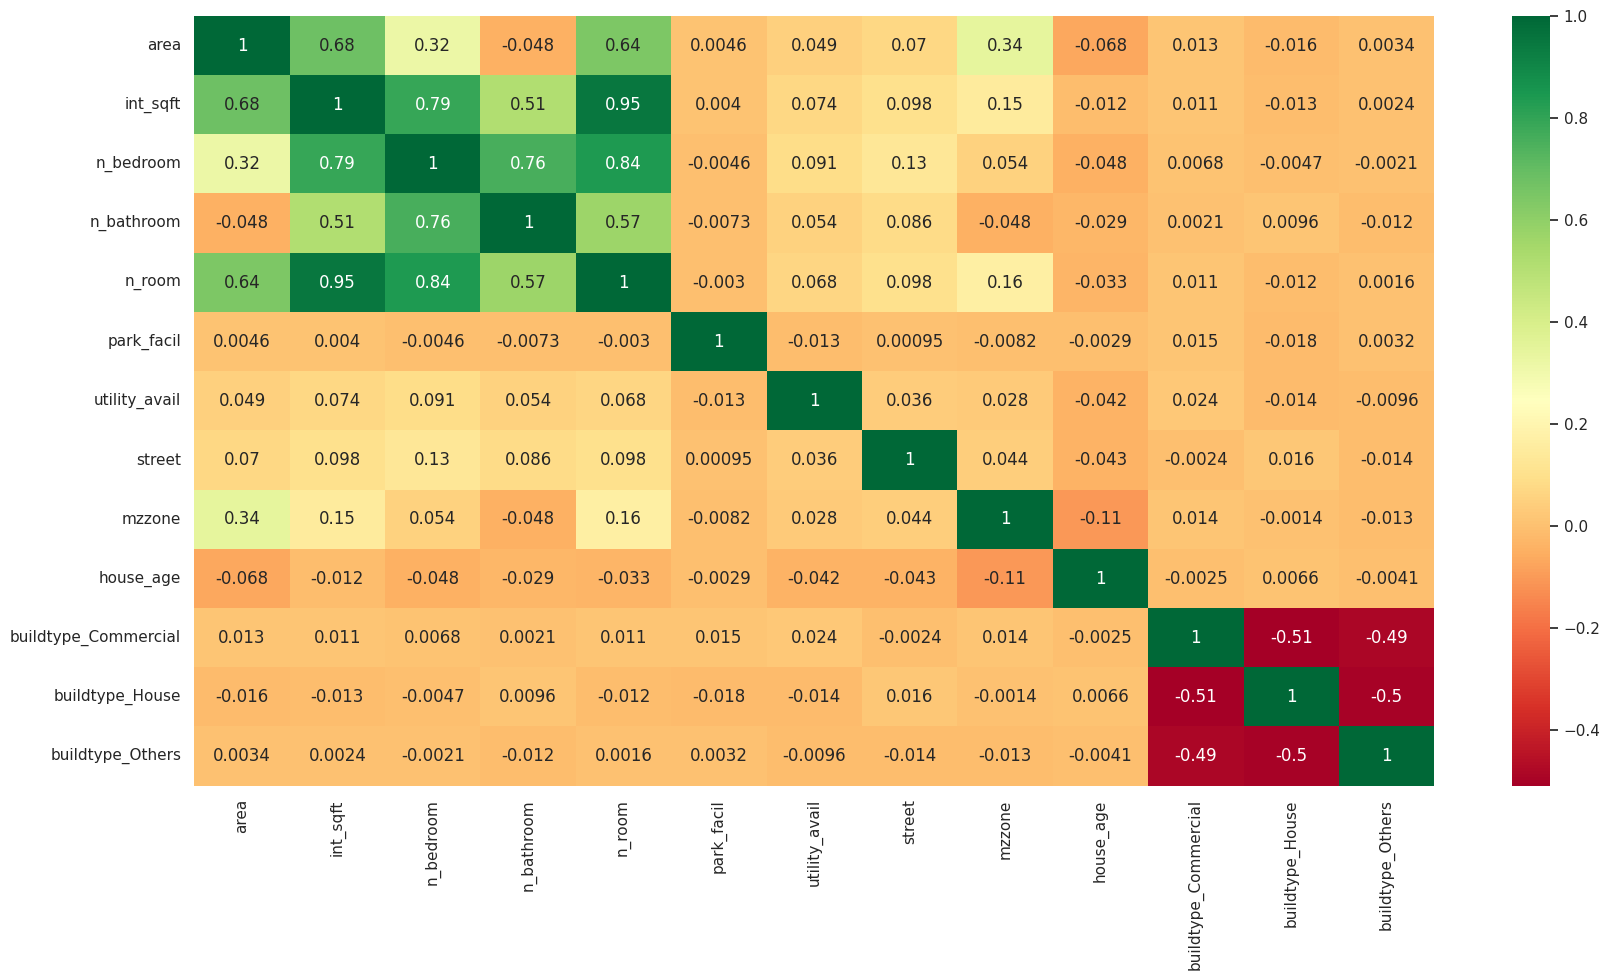

In [203]:
# correlation in input data is checked with heatmap
plt.figure(figsize=(20,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

#MODELING

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
#Scaling is needed for KNN AND KMEANS algorithm is mandatory

#LINEAR REGRESSION

In [205]:
# Linear Regression  -- below steps are mandatory to follow
from sklearn.linear_model import LinearRegression #import #scikit package
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train)  #fit
linear_model.predict(X_test) #predict

array([ 6483379.20300917, 17809620.62679802, 12513777.03556453, ...,
        8568838.35101661,  5363052.62132894,  7607479.57024364])

In [206]:
# cross validation - R2 (r square value)
cross_val_linear_model = cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.9195373537619588

#KNN

In [207]:
# K Nearest Neighbor Regression
# choosing the best k(neighbor) value
from sklearn.preprocessing import StandardScaler #import
scaler = StandardScaler() #initialize
scaler.fit(X_train)  #fit
X_train_scaled = scaler.transform(X_train) #transform
X_test_scaled  = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("k value: ",k,"cross_val_score: ", knn_regressor.score(X_train_scaled,y_train),cross_val_score(knn_regressor,X_train,y_train,cv=10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv=10).mean())


k value:  1 cross_val_score:  1.0 0.1486497210461219
k value:  2 cross_val_score:  0.9849341493073555 0.333689443452703
k value:  3 cross_val_score:  0.9793732454153323 0.38164749837265743
k value:  4 cross_val_score:  0.9752139815702858 0.40200859711360726
k value:  5 cross_val_score:  0.9718953586841798 0.41317371267134373
k value:  6 cross_val_score:  0.9693744511949386 0.41180700440628676
k value:  7 cross_val_score:  0.9671905276926527 0.41360147228204713
k value:  8 cross_val_score:  0.9652770414692858 0.4170319504278298
k value:  9 cross_val_score:  0.9636534601785143 0.4196380022409353
k value:  10 cross_val_score:  0.961832349192534 0.4219242730174824
k value:  11 cross_val_score:  0.9604912691298862 0.42125023033122827
k value:  12 cross_val_score:  0.9588469848993941 0.425546446092328
k value:  13 cross_val_score:  0.9576817281969251 0.42850050168877657
k value:  14 cross_val_score:  0.9564434961790217 0.42654865146210297
k value:  15 cross_val_score:  0.9555391828647014 0.4

Here we tried with range(1,15) , then(1,30)....hit and trail for k value (Hyperparameter) has been done
when we tried range(1,50) , the k=40 has the max value after that we were able to see decrease in value.
Therefore the k value is 40  --> value is 0.4111

And also here we calculated x_trainscaled value which says when k increases the value decrease - therefore this is way leads us to best model point (i:e) k=40

In [208]:
cross_val_knn_regressor=max(cross_val_knn)

In [ ]:
print("The best K-Value is 40 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 40 and Cross_val_score is 0.9544059048420038


#DECISION TreeRegressor

In [210]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,15)
cross_val_dt=[]
for d in max_depth:
  dt_regressor=DecisionTreeRegressor(max_depth=d,random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth :",d,"train score :",dt_regressor.score(X_train,y_train), "cross_val_score:",cross_val_score(dt_regressor,X_train,y_train,cv=15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv=15).mean())


Depth : 1 train score : 0.36119806159496615 cross_val_score: 0.35708637708622426
Depth : 2 train score : 0.6827033931173443 cross_val_score: 0.6788527004503228
Depth : 3 train score : 0.7997323681508934 cross_val_score: 0.7969511951291175
Depth : 4 train score : 0.8856835327758066 cross_val_score: 0.8793498234714927
Depth : 5 train score : 0.921859573423048 cross_val_score: 0.9132875109892865
Depth : 6 train score : 0.943687605442015 cross_val_score: 0.9346829766855705
Depth : 7 train score : 0.9597547805130187 cross_val_score: 0.948559767907618
Depth : 8 train score : 0.9729934010367188 cross_val_score: 0.9607938278200909
Depth : 9 train score : 0.9826214007673583 cross_val_score: 0.9684365727030467
Depth : 10 train score : 0.9894306140961924 cross_val_score: 0.9709401865566073
Depth : 11 train score : 0.9939808198284906 cross_val_score: 0.9728185938224482
Depth : 12 train score : 0.996876857363539 cross_val_score: 0.9734497531602552
Depth : 13 train score : 0.9984759183140816 cross_v

In [211]:
cross_val_dt_regressor=max(cross_val_dt)

In [212]:
print("The best K-Value is 12 and Cross_val_score is",cross_val_dt_regressor)

The best K-Value is 12 and Cross_val_score is 0.9737676934544122


In [213]:
print("linear regrssion model value is:",cross_val_linear_model)
print("Knn regression model value is:",cross_val_knn_regressor)
print("Decission Tree model value is:",cross_val_dt_regressor)

linear regrssion model value is: 0.9195373537619588
Knn regression model value is: 0.9538874694180907
Decission Tree model value is: 0.9737676934544122


#Random Forest Regressor

In [214]:
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.35783874267659965
Depth :  2 cross_val_score :  0.6795912804109996
Depth :  3 cross_val_score :  0.8144206146609554
Depth :  4 cross_val_score :  0.8923181761205374
Depth :  5 cross_val_score :  0.9283401268706502
Depth :  6 cross_val_score :  0.9502317144529968
Depth :  7 cross_val_score :  0.9656829041264513
Depth :  8 cross_val_score :  0.9758268985948539
Depth :  9 cross_val_score :  0.9818409411962911
Depth :  10 cross_val_score :  0.9852618969821834
Depth :  11 cross_val_score :  0.9869923698717395
Depth :  12 cross_val_score :  0.9878016523753582
Depth :  13 cross_val_score :  0.9881314958645381
Depth :  14 cross_val_score :  0.9882551912184323
Depth :  15 cross_val_score :  0.9883088007930273
Depth :  16 cross_val_score :  0.9883318956466943
Depth :  17 cross_val_score :  0.9883478860601376
Depth :  18 cross_val_score :  0.9883488366810934
Depth :  19 cross_val_score :  0.9883444869215524


In [215]:
cross_val_rf_regressor=max(cross_val_rf)

In [219]:
print(cross_val_rf_regressor)

0.9883488366810934


In [216]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=0)

In [217]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9883488366810934

#GRADIENT BOOSTING Regression

In [220]:
cross_val_gb=[]
for lr in [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.8,1]:
  gb_regressor= GradientBoostingRegressor(learning_rate=lr)
  gb_regressor.fit(X_train, y_train)
  print("Learning rate : ", lr, "cross_val_score : ", cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_gb.append(cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score :  0.7392536909957498
Learning rate :  0.05 cross_val_score :  0.9718350511971902
Learning rate :  0.1 cross_val_score :  0.988967711437326
Learning rate :  0.2 cross_val_score :  0.9929143233010307
Learning rate :  0.3 cross_val_score :  0.9930885648894502
Learning rate :  0.35 cross_val_score :  0.9931098964902513
Learning rate :  0.4 cross_val_score :  0.9935089286696159
Learning rate :  0.5 cross_val_score :  0.9933558252318225
Learning rate :  0.8 cross_val_score :  0.9931681223670404
Learning rate :  1 cross_val_score :  0.992179979673028


In [221]:
cross_val_gb_regressor=max(cross_val_gb)

In [222]:
gb_regressor= GradientBoostingRegressor(learning_rate=0.35)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.35)

In [223]:
cross_val_gb_regressor=cross_val_score(gb_regressor,X_train,y_train,cv=15).mean()
cross_val_gb_regressor

0.993107962398535

#Extreme Gradient Boosting Regression

In [224]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.9940067771270397
Learning rate :  0.05 cross_val_score: 0.9951649566997595
Learning rate :  0.08 cross_val_score: 0.9949779368411762
Learning rate :  0.09 cross_val_score: 0.9948731044575961
Learning rate :  0.1 cross_val_score: 0.994709961584877
Learning rate :  0.11 cross_val_score: 0.9946424062629651
Learning rate :  0.12 cross_val_score: 0.9945047552643769
Learning rate :  0.13 cross_val_score: 0.9944608367448043
Learning rate :  0.15 cross_val_score: 0.9942321293987889
Learning rate :  0.18 cross_val_score: 0.9938388754685668
Learning rate :  0.2 cross_val_score: 0.9937379498219133
Learning rate :  0.25 cross_val_score: 0.9930896234914475
Learning rate :  0.3 cross_val_score: 0.992646334996423


In [225]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [226]:
print(cross_val_xgb_regressor)

0.9951649566997595


In [227]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.12,n_estimators=1000) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [228]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9945047552643769

#Cross-Validation Score for Machine-Learning Models

In [229]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Gradient Boosting Regression Model: ",cross_val_gb_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.9195373537619588
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.9538874694180907
Cross Validation Score for Decision Tree Regression Model:  0.9737676934544122
Cross Validation Score for Random Forest Regression Model:  0.9883488366810934
Cross Validation Score for Gradient Boosting Regression Model:  0.993107962398535
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9945047552643769


#R2 Score for Machine-Learning Models

In [230]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_gb=gb_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


#Comparing unseen original test data with Predicted target data

In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_gb=r2_score(y_test,y_pred_gb)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

#Feature Importance

In [234]:
rf_regressor.feature_importances_

array([0.47609848, 0.11005576, 0.00230981, 0.0022943 , 0.00801706,
       0.0152583 , 0.00134049, 0.01114446, 0.03991081, 0.00638983,
       0.32187485, 0.00269489, 0.00261098])

In [235]:
df.columns

Index(['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'park_facil',
       'utility_avail', 'street', 'mzzone', 'sales_price', 'house_age',
       'buildtype_Commercial', 'buildtype_House', 'buildtype_Others'],
      dtype='object')

#Feature importance using Random Forest

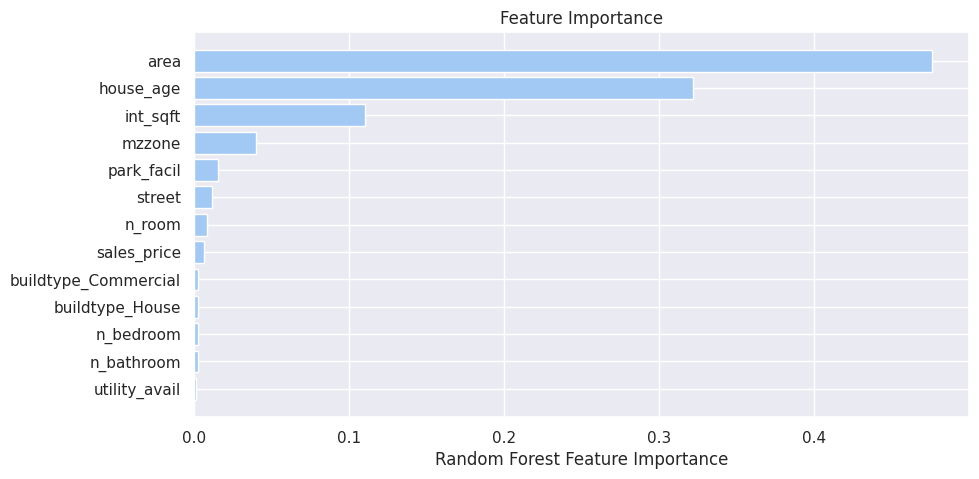

In [236]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

#Feature importance using XGB

In [237]:
xgb_regressor.feature_importances_

array([0.21212341, 0.01420385, 0.02303343, 0.0580106 , 0.1945308 ,
       0.02048113, 0.00143569, 0.01196096, 0.05682746, 0.00431331,
       0.20771892, 0.10411909, 0.09124137], dtype=float32)

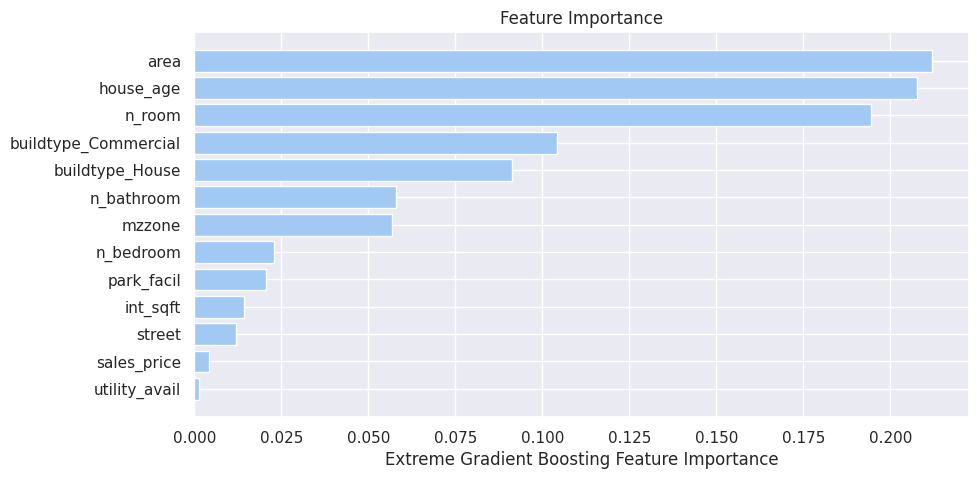

In [238]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

#CONCLUSION


By Considering Feature importance from the best model **Extreme Gradient Boosting algorithm**. Real Estate Owner should focus on the below feature order to receive more money for the houses.

1.House_age
2.Area
3.No of Rooms
4.Build type
5.MZ ZONE
6.Parking facility
7.No of bedrooms
8.Parking facility
9.Area(in_sqft)
10.Street
11.Sales_price
12.Utility

 # ******************* **THANK YOU**************************